# Notebook en el que se obtienen las opiniones de Inside Airbnb

by jemarle 🐷

Enlace que tengo que usar: https://insideairbnb.com/get-the-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import shutil
import zipfile

In [2]:
urlListings = "https://data.insideairbnb.com/spain/vc/valencia/2024-03-24/data/listings.csv.gz"
destination_folder = "./data/inside_airbnb"

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

filename_gz_listings = os.path.join(destination_folder, "listings.csv.gz")
response = requests.get(urlListings)
with open(filename_gz_listings, 'wb') as file:
    file.write(response.content)
    
urlReviews = "https://data.insideairbnb.com/spain/vc/valencia/2024-03-24/data/reviews.csv.gz"

filename_gz_reviews = os.path.join(destination_folder, "reviews.csv.gz")
response = requests.get(urlReviews)
with open(filename_gz_reviews, 'wb') as file:
    file.write(response.content)

In [3]:
files = os.listdir(destination_folder)
files

['listings.csv.gz', 'reviews.csv.gz']

En detailedReviews tenemos todas las Reviews por separado, repitiéndose por cada alojamiento (listing) igual.

In [4]:
detailedReviews = pd.read_csv('./data/inside_airbnb/reviews.csv.gz', compression='gzip', low_memory=False)
detailedReviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,48154,117554,2010-10-12,180238,Martha,Toni's place was perfect in so many ways. It ...
1,48154,145645,2010-11-28,204240,Mark,Awesome stay!! We'd recommend Toni's apartment...
2,48154,190572,2011-03-01,258565,Domenico,really nice house in a wonderfull position! yo...
3,48154,195081,2011-03-08,213496,Romina & Martín,"Apartamento muy agradable, al igual que su pro..."
4,48154,218435,2011-04-05,340330,Jenna,"Was a great apartment, easy access to the site..."


En detailedListings aparece cada alojamiento (id única). Aparece un neighborhood_overview, donde supongo que habrán hecho la extracción de características de antemano ya ellos.

In [5]:
# Leer el archivo listings.csv.gz, donde dentro hay un csv llamado listings.csv
detailedListings = pd.read_csv(destination_folder + '/listings.csv.gz', compression='gzip', low_memory=False)
detailedListings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,26405420,https://www.airbnb.com/rooms/26405420,20240324214747,2024-03-24,city scrape,Ca María,2mts from the beach. Jacuzzi terrace A<br /><b...,It is a very quiet and residential neighborhoo...,https://a0.muscache.com/pictures/fbb3dfe2-d1f0...,198185545,...,4.99,4.75,4.67,vt-46858 v,f,2,2,0,0,1.83
1,1110191981989532950,https://www.airbnb.com/rooms/1110191981989532950,20240324214747,2024-03-25,city scrape,Feliz casa!,"2 km to city center, good transportation, supe...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,312158352,...,NaN,NaN,NaN,NaN,t,1,0,0,1,NaN
2,970202040703865678,https://www.airbnb.com/rooms/970202040703865678,20240324214747,2024-03-25,city scrape,apartamento completo 4,The apartment does not have a kitchen and does...,NaN,https://a0.muscache.com/pictures/4457bfe1-47da...,474489305,...,NaN,NaN,NaN,NaN,f,24,4,20,0,NaN
3,1110200636787207468,https://www.airbnb.com/rooms/1110200636787207468,20240324214747,2024-03-25,city scrape,Eco Suite mediterránea,Forget the worries in this great home - it's a...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,425428991,...,NaN,NaN,NaN,NaN,t,10,10,0,0,NaN
4,1093325332010686347,https://www.airbnb.com/rooms/1093325332010686347,20240324214747,2024-03-25,previous scrape,Apartment close to the Turia,Enjoy a stylish experience at this centrally-l...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,287097266,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [6]:
detailedListings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
detailedListings['id'].nunique()

8829

In [8]:
detailedListings['neighbourhood_group_cleansed'].unique()

# contar los únicos

detailedListings['neighbourhood_group_cleansed'].nunique()

19

In [9]:
# valores distintos de NA count en la columna neighborhood_overview

detailedListings['neighborhood_overview'].nunique()

3420

In [10]:
# Msotrar primeros de detailedListings que no sean NA

detailedListings['neighborhood_overview'].dropna().head(n = 10)

0     It is a very quiet and residential neighborhoo...
5     UBICADO Entre las Av. del Puerto y de Francia,...
6     Estamos a un paso de todo, a 5 minutos a pie d...
14    Valencia is a famous Spanish city visited by t...
15    The Botànic and El Carmen neighborhoods are tw...
19    La ubicación de la calle esta bien estudiada e...
23    El Barrio es encantador, muy bien comunicado a...
28    Un Barrio tranquilo, muy cerca de supermercado...
30    Estamos en un barrio tradicional valenciano. ....
32    El Cabanyal, located in Valencia, is a vibrant...
Name: neighborhood_overview, dtype: object

<Axes: xlabel='neighbourhood_group_cleansed'>

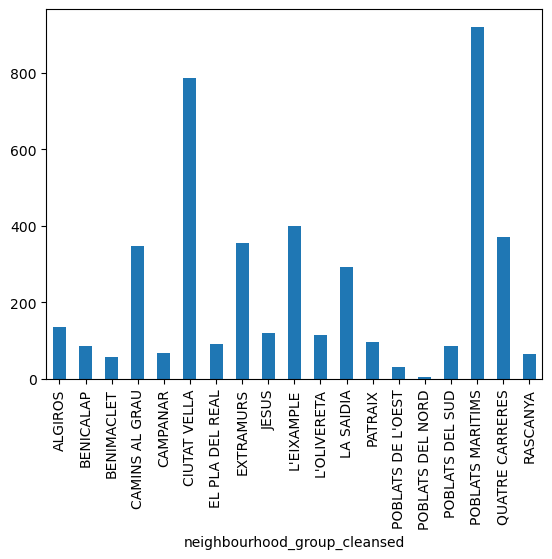

In [11]:
detailedListings.groupby('neighbourhood_group_cleansed')['neighborhood_overview'].count()
detailedListings.groupby('neighbourhood_group_cleansed')['neighborhood_overview'].count().plot(kind = 'bar')

In [12]:
idDistritos = pd.read_csv('./data/barrios/districtes-distritos.csv', delimiter=';')
idDistritos.head()

,objectid,Nombre,Código distrito,gis.gis.DISTRITOS.area,geo_shape,geo_point_2d,latitud,longitud
0,8,EL PLA DEL REAL,6,1692712.875,"{""coordinates"": [[[-0.3622859877164847, 39.484...","39.4745936913893, -0.3603780274174357",39.474594,-0.360378
1,10,EXTRAMURS,3,1971616.250,"{""coordinates"": [[[-0.3833952362210292, 39.481...","39.469024187643456, -0.385780005864596",39.469024,-0.385780
2,12,L'EIXAMPLE,2,1733140.500,"{""coordinates"": [[[-0.36453615919605226, 39.47...","39.46411452334249, -0.3704292703233094",39.464115,-0.370429
3,71,ALGIROS,13,NaN,"{""coordinates"": [[[-0.342757228635524, 39.4870...","39.47762702932769, -0.3427393297488325",39.477627,-0.342739
4,135,RASCANYA,15,NaN,"{""coordinates"": [[[-0.36769572194284833, 39.50...","39.495738628061105, -0.3676525156959352",39.495739,-0.367653


In [13]:
# Ver si hay una equivalencia entre los valores de idDistritos['Nombre']  y detailedListings['neighbourhood_group_cleansed'] (en el sentido de que haya una equivalencia uno a uno entre los valores de ambas columnas)

idDistritos['Nombre'].nunique()

detailedListings['neighbourhood_group_cleansed'].nunique()

# Ver si hay una equivalencia uno a uno entre los valores de ambas columnas

set(idDistritos['Nombre']) == set(detailedListings['neighbourhood_group_cleansed'])

True

In [14]:
# guardar un dataframe con detailedReviews_neigh en el que se cojan solo las filas en las que neighborhood_overview no sea NA

detailedListings_neigh = detailedListings[detailedListings['neighborhood_overview'].notna()]

In [15]:
!pip install langdetect
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

# Aplicar la detección de idioma a cada reseña en el DataFrame detailedReviews
detailedListings['language'] = detailedListings['neighborhood_overview'].apply(detect_language)

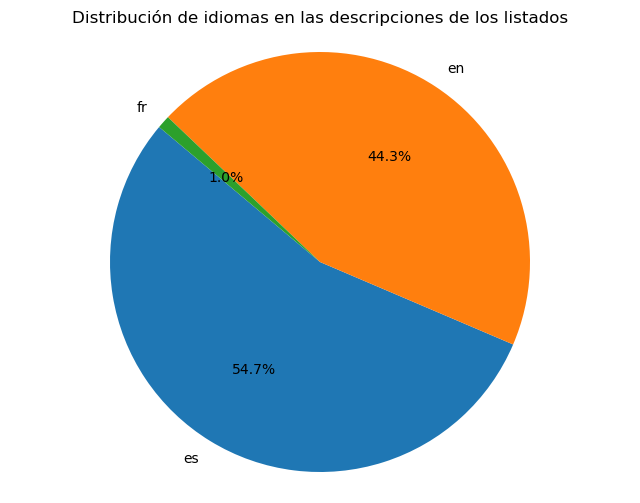

In [16]:
# Filtrar las descripciones de los listados que no son 'unknown'
filtered_descriptions = detailedListings[detailedListings['language'] != 'unknown']

# Contar la frecuencia de cada idioma
language_counts = filtered_descriptions['language'].value_counts()

top_languages = language_counts.head(3)
total_filtered_descriptions = len(filtered_descriptions)
top_languages_percentage = (top_languages / total_filtered_descriptions) * 100

plt.figure(figsize=(8, 6))
plt.pie(top_languages_percentage, labels=top_languages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de idiomas en las descripciones de los listados')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 1200x800 with 0 Axes>

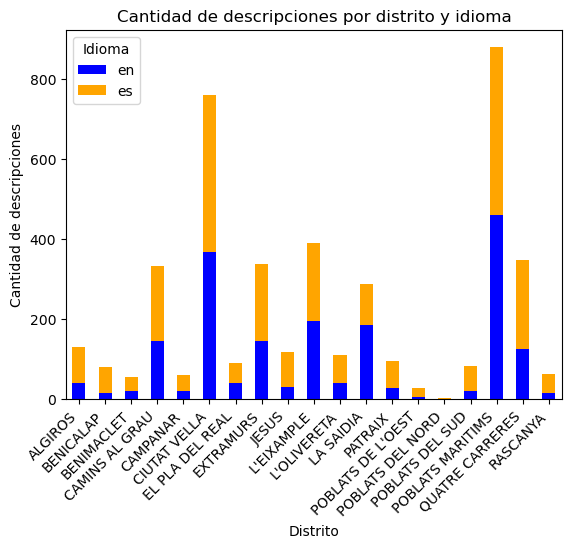

In [17]:
filtered_descriptions = detailedListings[detailedListings['language'].isin(['en', 'es'])]

# Agrupar por distrito e idioma y contar la cantidad de descripciones para cada grupo
grouped_counts = filtered_descriptions.groupby(['neighbourhood_group_cleansed', 'language']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
grouped_counts.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Cantidad de descripciones por distrito y idioma')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de descripciones')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Idioma')
plt.show()

In [20]:
detailedListings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,language
0,26405420,https://www.airbnb.com/rooms/26405420,20240324214747,2024-03-24,city scrape,Ca María,2mts from the beach. Jacuzzi terrace A<br /><b...,It is a very quiet and residential neighborhoo...,https://a0.muscache.com/pictures/fbb3dfe2-d1f0...,198185545,...,4.75,4.67,vt-46858 v,f,2,2,0,0,1.83,en
1,1110191981989532950,https://www.airbnb.com/rooms/1110191981989532950,20240324214747,2024-03-25,city scrape,Feliz casa!,"2 km to city center, good transportation, supe...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,312158352,...,NaN,NaN,NaN,t,1,0,0,1,NaN,unknown
2,970202040703865678,https://www.airbnb.com/rooms/970202040703865678,20240324214747,2024-03-25,city scrape,apartamento completo 4,The apartment does not have a kitchen and does...,NaN,https://a0.muscache.com/pictures/4457bfe1-47da...,474489305,...,NaN,NaN,NaN,f,24,4,20,0,NaN,unknown
3,1110200636787207468,https://www.airbnb.com/rooms/1110200636787207468,20240324214747,2024-03-25,city scrape,Eco Suite mediterránea,Forget the worries in this great home - it's a...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,425428991,...,NaN,NaN,NaN,t,10,10,0,0,NaN,unknown
4,1093325332010686347,https://www.airbnb.com/rooms/1093325332010686347,20240324214747,2024-03-25,previous scrape,Apartment close to the Turia,Enjoy a stylish experience at this centrally-l...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,287097266,...,NaN,NaN,NaN,f,1,1,0,0,NaN,unknown


In [19]:
detailedListings.to_csv('./data/insideListings.csv', index = False)